# Exercise 1

In [1]:
#setting up imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.optimize import minimize
from scipy import special
from scipy import integrate
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

# Part 1.

In [2]:
#defining a function for the deviation angle as incident angle(t), A and n vary
def angleout(t, A, n):
    return(np.arcsin((n**2 - (np.sin(t))**2)**0.5*np.sin(A)-np.sin(t)*np.cos(A))+t-A)

C:\Users\gfpet\AppData\Local\Temp\ipykernel_21420\3682625938.py:3: RuntimeWarning: invalid value encountered in arcsin
  return(np.arcsin((n**2 - (np.sin(t))**2)**0.5*np.sin(A)-np.sin(t)*np.cos(A))+t-A)


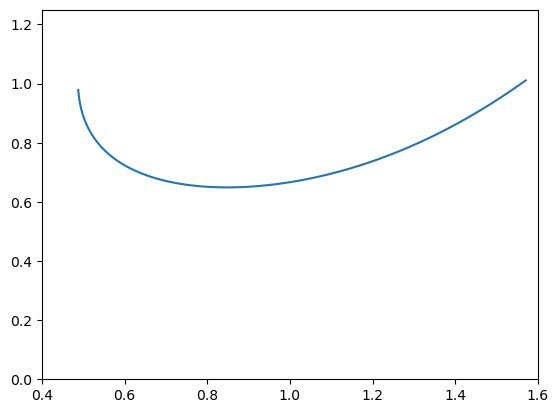

In [3]:
#creating a figure to plot the deviation angle against incident angle(t)
fig, ax = plt.subplots()
#putting limits on the graph so that the function is appropriately displayed
ax.set(xlim=(0.4,1.6), ylim=(0,1.25))
tvals = np.linspace(-(np.pi/2), (np.pi/2), 1800)
#plotting the function
ax.plot(tvals, angleout(tvals, (np.pi/3), 1.5))

# Part 2.

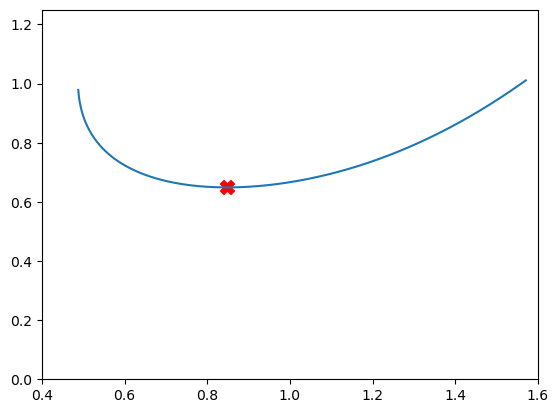

In [4]:
#setting an inital x-value guess for the lowest point on the function
initial_guess = (0.85)
#using optimisation to find the lowest point
res = minimize(angleout, x0=initial_guess, args=((np.pi/3),1.5))
#plotting the lowest point on the same graph as the function
ax.scatter(res.x, angleout(res.x, (np.pi/3), 1.5), marker='X', s = 100, c='r')
fig

In [5]:
#calculating the minimum y-value (deviation angle)
min=((angleout(res.x, (np.pi/3), 1.5))/np.pi)*180
#returning the minimum deviation angle
print("The minimum deviation angle is", min[0], "degrees.")

The minimum deviation angle is 37.18075578194758 degrees.


# Part 3.

In [6]:
#defining a function to calculate the minimum deviation angle for a given apex angle and a given refractive index
def minangle(A, n):
    return (((2*(np.arcsin(n*np.sin(A/2)))-A)/np.pi)*180)

In [7]:
#returning the minimum deviation angle when the apex angle is 60 degrees and the refractive index is 1.5
print("The minimum deviation angle when A=pi/3 and n=1.5 is", minangle((np.pi/3),1.5), "degrees.")

The minimum deviation angle when A=pi/3 and n=1.5 is 37.18075578145827 degrees.


# Exercise 2.

# Part 1.

In [8]:
#defining the gaussian function
def gaus(x):
    return (np.exp(-x**2))

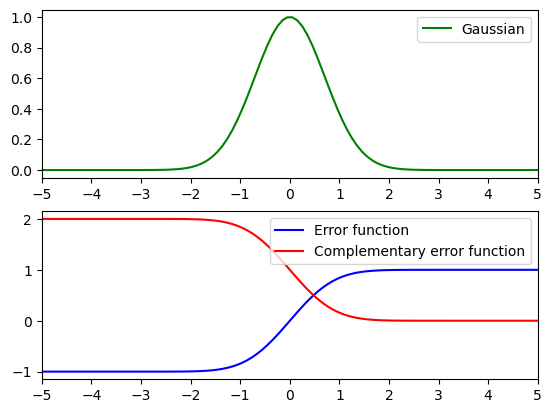

In [9]:
#creating a two-figure plot
fig, axs = plt.subplots(2)
#setting the range through which the function should be displayed
xvals = np.linspace(-5,5,100)
#setting the x-axis limits and numbering them
axs[0].set(xlim=(-5,5), xticks=np.linspace(-5, 5, 11))
axs[1].set(xlim=(-5,5), xticks=np.linspace(-5, 5, 11))
#plotting the gaussian function on the top plot
axs[0].plot(xvals, gaus(xvals), label = "Gaussian", color = "green")
#plotting the error function and complementary error function on the bottom plot
axs[1].plot(xvals, special.erf(xvals), label="Error function", color = "blue")
axs[1].plot(xvals, special.erfc(xvals), label="Complementary error function" , color = "red")
#displaying which line represents what on each plot using a legend
axs[0].legend()
axs[1].legend()

# Part 2.

In [10]:
#finding the area under the gaussian function
area = integrate.quad(gaus,-np.inf,np.inf)
#calculating the square root of pi
sqrtpi = np.pi**0.5
#demonstrating that the area under the gaussian function is the square root of pi
print("The area under the Gaussian function is", area[0], "and the square root of pi is", sqrtpi)

The area under the Gaussian function is 1.7724538509055159 and the square root of pi is 1.7724538509055159


# Part 3.

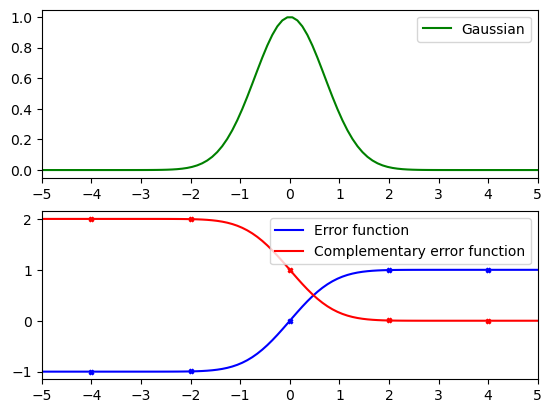

In [11]:
#setting up a few useful variables
zvals = [-4,-2,0,2,4]
integ1 = [0,0,0,0,0]
integ2 = [0,0,0,0,0]
n = 0
#using a while loop to plot both points for each value of z
while n<5:
    #calculating the area under the gaussian between 0 and z
    area1 = integrate.quad(gaus, 0, zvals[n])
    #taking just the value produced by the "integrate.quad" function
    integ1[n] = area1[0]
    #calculating the area under the gaussian between z and infinity
    area2 = integrate.quad(gaus, zvals[n], np.inf)
    #taking just the value produced by the "integrate.quad" function
    integ2[n] = area2[0]
    #plotting both points for each value of z
    axs[1].scatter(zvals[n], integ1[n]*(2/(np.pi**0.5)), marker='X', s = 10, c='blue')
    axs[1].scatter(zvals[n], integ2[n]*(2/(np.pi**0.5)), marker='X', s = 10, c='red')
    #moving to the next value of z
    n = n + 1
fig